In [1]:
from multi_agents.graph.builder import GraphBuilder
import asyncio
from multi_agents.graph.state import AgentState
import logging


INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Successfully loaded faiss with AVX2 support.
c:\Users\hafss\OneDrive\Desktop\stifi\multi-agent-system-for-identity-revelalion-and-reporting\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


In [2]:
graph_builder = GraphBuilder()

In [3]:
graph_builder

In [4]:
app = graph_builder.build_graph()

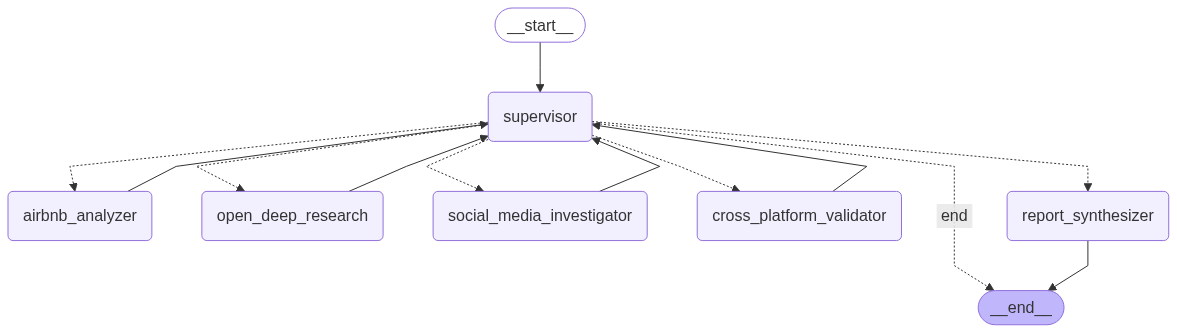

In [5]:
app

In [6]:
query = "Find the online identity of the hoster at https://www.airbnb.com/users/show/532236013"

initial_state = {
    "plan": [],
    "past_steps": [],
    "aggregated_results": {},
    "final_report": "",
    "messages": [],
    "last_step_result": None,
    "last_step_message": None,
    "awaiting_user_confirmation": False,
    "candidate_options": [],
    "selected_candidate": None,
}

In [7]:
import logging
import sys

# Get the specific logger for the deep research agent
dr_logger = logging.getLogger("multi_agents.open_deep_research")
dr_logger.setLevel(logging.INFO) # We still want to see the messages

# Create a handler that prints to your console
simple_handler = logging.StreamHandler(sys.stdout)

# Create a formatter that ONLY prints the message, without any prefixes
simple_formatter = logging.Formatter('%(message)s')
simple_handler.setFormatter(simple_formatter)

# CRITICAL: Replace the old handlers with our new, simple one
dr_logger.handlers = [simple_handler]
dr_logger.propagate = False 

In [8]:
final_state = await app.ainvoke(initial_state)

KeyError: 'original_query'

In [ ]:

print("\nFinal Report:")
print(final_state.get("final_report", "No report generated"))


Final Report:
 # Comprehensive Investigation Report: Airbnb Host Identification

## Overview

This report presents the findings of an investigation into the online identity of the Airbnb host with the user ID 532236013, whose profile can be found at [https://www.airbnb.com/users/show/532236013](https://www.airbnb.com/users/show/532236013).

## Host Information

- **Name**: Abdel
- **Profession**: Entrepreneur and Airbnb Host
- **Location**: Marrakech, Morocco

### Bio

Abdel describes himself as a passionate entrepreneur and Airbnb host in Marrakech. He offers a variety of accommodations, including apartments, riads, rental units, and bed and breakfasts.

### About Section

The "About" section of Abdel's profile provides additional details about his work, destinations, and pets.

#### Work

Abdel is an entrepreneur, and his Airbnb hosting is one of his ventures.

#### Destinations

Abdel's accommodations are located in Marrakech, Morocco. However, there is potential for connections to

In [ ]:
from langchain_openai import ChatOpenAI
from multi_agents.constants.constants import Constants
llm = ChatOpenAI(
    base_url=Constants.OPENROUTER_BASE_URL,
    api_key=Constants.OPENROUTER_API_KEY,
    model_name=Constants.DEFAULT_MODEL,
    temperature=0.1,
    max_tokens=4096
)

In [ ]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x00000267A5805C10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000267A01DF590>, root_client=<openai.OpenAI object at 0x00000267A01CBC10>, root_async_client=<openai.AsyncOpenAI object at 0x00000267A01ED310>, model_name='meta-llama/llama-3.3-70b-instruct', temperature=0.1, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://openrouter.ai/api/v1', max_tokens=4096)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages([
            ("system", """You are an expert digital investigator supervisor. Analyze the user query and create a step-by-step investigation plan.
             
             Available worker agents:
             - airbnb_analyzer: For analyzing Airbnb profiles/listings
             - web_search_investigator: For performing web searches
             - social_media_investigator: For searching social media platforms
             - cross_platform_validator: For correlating data across platforms
             
             Respond with a JSON array of steps, each with 'agent' and 'inputs' fields."""),
            ("human", "{query}")
        ])
        


chain = prompt | llm 

In [ ]:

chain.invoke({"query": query})

KeyboardInterrupt: 

In [ ]:
llm.invoke(ChatPromptTemplate.from_messages('human','what is 3 + 4: '))

In [ ]:
from multi_agents.tools.airbnb_tools import get_airbnb_profile_details

In [ ]:
get_airbnb_profile_details.description

In [ ]:
get_airbnb_profile_details.name